# Notebook on Creating some Figures in Paper

In [1]:
import pandas as pd 
import numpy as np
pd.set_option('display.max_rows', 100)
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
plt.style.use(plt.style.available[24])
plt.rc('font', size=12)          # controls default text sizes
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=16)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=12)    # fontsize of the xtick labels
plt.rc('ytick', labelsize=12)     # fontsize of the ytick labels (also applies to colorbar)
plt.rc('legend', fontsize=12)    # legend fontsize
plt.rc('figure', titlesize=20)   # fontsize of the figure title
plt.rc('lines', linewidth=2)     # line width
plt.rc('figure', figsize=(6, 5)) # figure size
plt.rc('axes', axisbelow=True)
import sys

## Create Figure 1: Target Expansion

/tmp/ipykernel_263025/3303011686.py:50: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks().tolist(), fontsize=12)


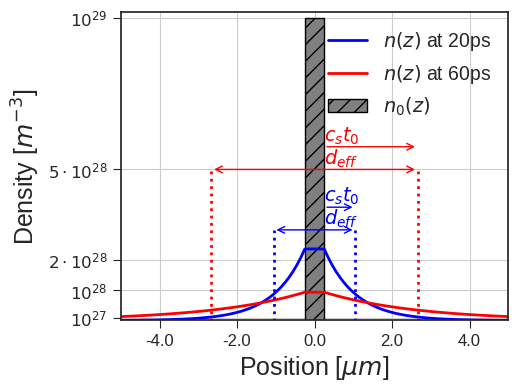

In [2]:
n0 = 1e29
nmax1 = 2.37e28
nmax2 = 9.38e27
xs = np.linspace(-5, 5, 100)
cs_t1 = 40238 * 20e-12 * 1e6
cs_t2 = cs_t1 * 3
deff1 = 0.5 + 2*cs_t1
deff2 = 0.5 + 2*cs_t2 
nc = 1.74e27 * np.ones_like(xs)
xf = 5
def n(x, cs_t, nmax):
    return np.where(np.abs(x) > xf, 0, 
            np.where(np.abs(x) > 0.25, nmax * np.exp(-((np.abs(x)-0.25)/(cs_t))), 
                     nmax))
ns1 = n(xs, cs_t1, nmax1)
ns2 = n(xs, cs_t2, nmax2)
fig, ax = plt.subplots(figsize=(5, 4))
ax.grid(True)
ax.bar(0, n0, width=0.5, color='gray', edgecolor='k', hatch='//', label='$n_0(z)$', fill=True)
ax.plot(xs, ns1, color='blue',  label='$n(z)$ at 20ps')
ax.plot(xs, ns2, color='red', label='$n(z)$ at 60ps')
#ax.plot(xs, nc, label='$n_{crit}$', linestyle='dotted', color='red')

ax.annotate('', xy=(-deff1/2, 3e28), xytext=(deff1/2, 3e28), 
            arrowprops=dict(arrowstyle='<->', color='blue'))
ax.text(0.25, 3e28, '$d_{eff}$', va='bottom', ha='left', fontsize=14, color='blue')
ax.vlines([-deff1/2, deff1/2], 0, 3e28, linestyle='dotted', color='blue')
ax.legend(fontsize=14)

ax.annotate('', xy=(0.25, 3.75e28), xytext=(0.25 + cs_t1, 3.75e28), 
            arrowprops=dict(arrowstyle='<-', color='blue'))
ax.text(0.25, 3.75e28, '$c_s t_0$', va='bottom', ha='left', fontsize=14, color='blue')

ax.annotate('', xy=(-deff2/2, 5e28), xytext=(deff2/2, 5e28), 
            arrowprops=dict(arrowstyle='<->', color='red'))
ax.text(0.25, 5e28, '$d_{eff}$', va='bottom', ha='left', fontsize=14, color='red')
ax.vlines([-deff2/2, deff2/2], 0, 5e28, linestyle='dotted', color='red')

ax.annotate('', xy=(0.25, 5.75e28), xytext=(0.25 + cs_t2, 5.75e28), 
            arrowprops=dict(arrowstyle='<-', color='red'))
ax.text(0.25, 5.75e28, '$c_s t_0$', va='bottom', ha='left', fontsize=14, color='red')

ax.legend(fontsize=14)
#ax.set_yscale('log')
ax.set_xlabel('Position [$\mu m$]', fontsize=18)
ax.set_ylabel('Density [$m^{-3}$]', fontsize = 18)
ax.set_ylim(1e26, 1.02e29)
ax.set_xlim(-5, 5)
ax.set_yticks([1e27, 1e28, 2e28, 5e28, 1e29])
ax.set_xticklabels(ax.get_xticks().tolist(), fontsize=12)
ax.set_yticklabels(['$10^{27}$', '$10^{28}$', '$2\cdot10^{28}$', '$5\cdot10^{28}$', '$10^{29}$'], fontsize=12)
fig.savefig('plots/density_profile.eps', format='eps', bbox_inches='tight')

## Create Figure 2: Max Proton Energy Dip

In [3]:
noise = 0
identifier = 'threeEns'
df = pd.read_hdf(f'fuchs_v5_0_seed-2_train_1525000_noise_{noise}_{identifier}_.h5', key='df').fillna(0)
df.head()

,Intensity,Pulse Duration,Target Thickness,Spot Size,Focal Distance,Contrast,Max Proton Energy,Total Proton Energy,Avg Proton Energy,Max Exact Energy,Total Exact Energy,Avg Exact Energy,Laser Energy,Conversion Efficiency
0,1.000000e+18,40.0,0.5,1.5,-30.0,1.000000e-07,0.232522,3.088778e+07,0.038089,0.232522,3.088778e+07,0.038089,1.370048,0.003612
1,1.000000e+18,40.0,0.5,1.5,-30.0,1.183673e-07,0.220504,2.806581e+07,0.036870,0.220504,2.806581e+07,0.036870,1.366207,0.003291
2,1.000000e+18,40.0,0.5,1.5,-30.0,1.367347e-07,0.210142,2.574132e+07,0.035780,0.210142,2.574132e+07,0.035780,1.362653,0.003026
3,1.000000e+18,40.0,0.5,1.5,-30.0,1.551020e-07,0.201052,2.378342e+07,0.034792,0.201052,2.378342e+07,0.034792,1.359332,0.002803
4,1.000000e+18,40.0,0.5,1.5,-30.0,1.734694e-07,0.192968,2.210551e+07,0.033888,0.192968,2.210551e+07,0.033888,1.356202,0.002611


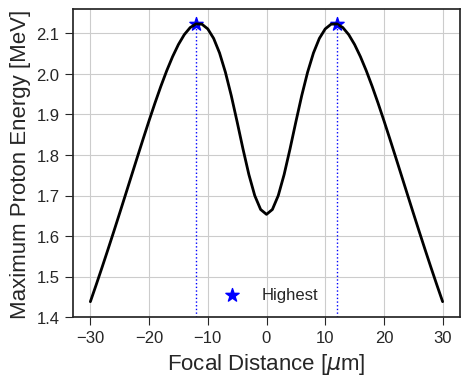

In [4]:
df_subset = df[(df['Intensity'] > 0.999e19) & (df['Contrast'] < 1.001e-7) & (df['Target Thickness'] == 0.5)]
fig, ax = plt.subplots(figsize=(5, 4))
order = np.argsort(df_subset['Max Proton Energy']).values
ax.grid()
ax.plot(df_subset['Focal Distance'], df_subset['Max Proton Energy'], color='k')
ax.scatter(df_subset['Focal Distance'].iloc[order[-1]], df_subset['Max Proton Energy'].iloc[order[-1]], marker='*', color='blue', label='Highest', s=100)
ax.scatter(df_subset['Focal Distance'].iloc[order[-2]], df_subset['Max Proton Energy'].iloc[order[-2]], marker='*', color='blue', s=100)
ax.vlines(df_subset['Focal Distance'].iloc[order[-2:]], 1.4, df_subset['Max Proton Energy'].iloc[order[-2:]], linestyle='dotted', color='blue', lw=1)
ax.legend(loc='lower center')
ax.set_ylim(1.4, None)
ax.set_xlabel('Focal Distance [$\mu$m]')  
ax.set_ylabel('Maximum Proton Energy [MeV]')
fig.savefig('plots/energy_dip.eps', format='eps', bbox_inches='tight')

In [5]:
df_subset['Max Proton Energy'].iloc[order[-2:]]

1503500    2.123137
1515500    2.123137
Name: Max Proton Energy, dtype: float64

## Create Figure 3: Neural Network Architecture

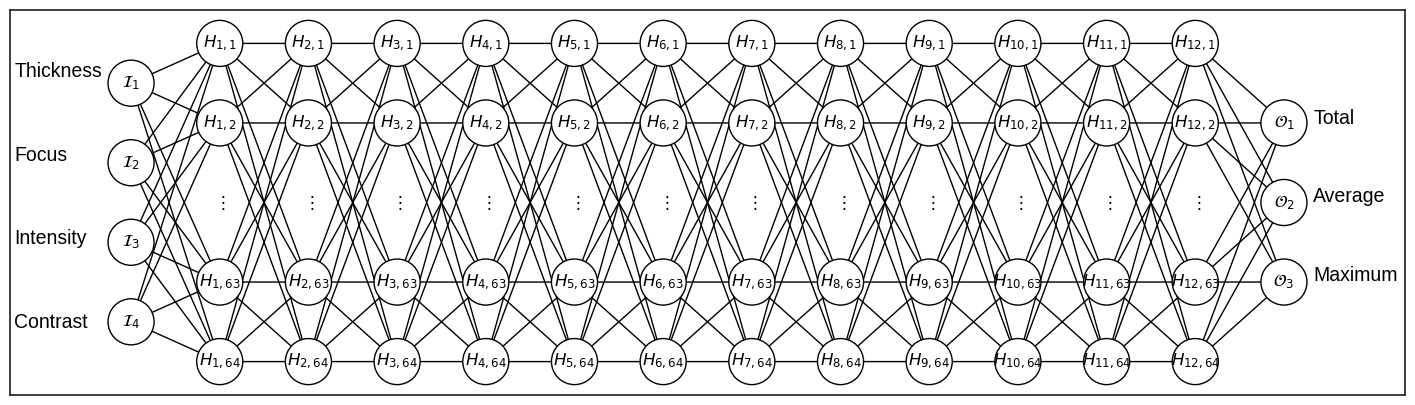

In [6]:
import networkx as nx
import matplotlib.patches as mpatches

plt.figure(figsize=(18, 5))
# plt.arrow(-0.5, 1.2, 1, 0, head_width=0.05, head_length=0.05, fc='w', ec='k')
fsize = 14

x1 = -1.17
x2 = 1.05
plt.text(x1, 0.24, "Thickness", color='k', fontsize=fsize)
plt.text(x1, 0.08, "Focus", color='k', fontsize=fsize)
plt.text(x1, -0.08, "Intensity", color='k', fontsize=fsize)
plt.text(x1, -0.24, "Contrast", color='k', fontsize=fsize)

plt.text(x2, -0.15, "Maximum", color='k', fontsize=fsize)
plt.text(x2, 0.15, "Total", color='k', fontsize=fsize)
plt.text(x2, 0, "Average", color='k', fontsize=fsize)
# Define the number of nodes in each layer
layers = [4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3]
blanked_nodes = np.arange(0, 60, 5) + 6

# Create a new directed graph
G = nx.DiGraph()

# Add nodes and edges for each layer
start = 0
for i in range(len(layers) - 1):
    # Add nodes for this layer and the next one
    G.add_nodes_from(range(start, start + layers[i]), layer=i)
    G.add_nodes_from(range(start + layers[i], start + layers[i] + layers[i+1]), layer=i+1)

    # Add edges between this layer and the next one
    for j in range(start, start + layers[i]):
        for k in range(start + layers[i], start + layers[i] + layers[i+1]):
            if k not in blanked_nodes and j not in blanked_nodes:
                G.add_edge(j, k)

    # Update the start for the next layer
    start += layers[i]

# Draw the graph
pos = nx.multipartite_layout(G, subset_key="layer")

# Create a dictionary for node colors and shapes
node_colors = []
node_shapes = []
edge_colors = []
for node in G.nodes():
    # Get the layer of the node
    layer = G.nodes[node]['layer']

    # If the node is in the middle layers and is not the top or bottom node, set its color to red and shape to square
    if 0 < layer < len(layers) - 1:
        edge_colors.append('black')
    else:
        edge_colors.append('black')

for i in blanked_nodes:
    edge_colors[i] = "white"

nx.draw_networkx_nodes(G, pos, node_color='white', edgecolors=edge_colors, node_shape='o', node_size=1100)
nx.draw_networkx_edges(G, pos, arrowsize=10)

# Create labels for the nodes
labels = ["$\mathcal{I}_1$", "$\mathcal{I}_2$", "$\mathcal{I}_3$", "$\mathcal{I}_4$"]
for i in range(len(layers)-2):
    labels.append(f"$H_{{{i+1},{1}}}$")
    labels.append(f"$H_{{{i+1},{2}}}$")
    labels.append(r'$\vdots$')
    labels.append(f"$H_{{{i+1},{63}}}$")
    labels.append(f"$H_{{{i+1},{64}}}$")
labels += ["$\mathcal{O}_1$", "$\mathcal{O}_2$", "$\mathcal{O}_3$"]
labels = dict(zip(G.nodes(), labels))

# Draw labels

nx.draw_networkx_labels(G, pos, labels=labels)
#plt.subplots_adjust(left=0.13, right=0.87)
plt.savefig('plots/nn_architecture.eps', format='eps', bbox_inches='tight')